In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from datetime import datetime
print("Done")

Done


In [2]:
mfe = 0.8151
mal = 0.2942
m_err = 1e-4

In [3]:
data = pd.read_csv("../data/data.csv")
data["Tk"] = data["Tk"].apply(lambda x: float(x.replace(',', '.')))
data["R"] = data["R"].apply(lambda x: float(x.replace(',', '.')))
data = data.drop(index=751)
data

,Time,Tk,R
0,1,21.702549,17.858393
1,2,21.694693,17.858854
2,3,21.709042,17.858576
3,4,21.712578,17.858589
4,5,21.689325,17.859152
...,...,...,...
10146,10147,24.438602,17.937750
10147,10148,24.411072,17.938234
10148,10149,24.397715,17.937531
10149,10150,24.393442,17.937799


In [111]:
data["T"] = 14.377980252039598845 * data["R"] + 39.35514018691588785 - 273
data

,Time,Tk,R,T
0,1,21.702549,17.858393,23.122758
1,2,21.694693,17.858854,23.129393
2,3,21.709042,17.858576,23.125390
3,4,21.712578,17.858589,23.125582
4,5,21.689325,17.859152,23.133672
...,...,...,...,...
10146,10147,24.438602,17.937750,24.263753
10147,10148,24.411072,17.938234,24.270719
10148,10149,24.397715,17.937531,24.260599
10149,10150,24.393442,17.937799,24.264466


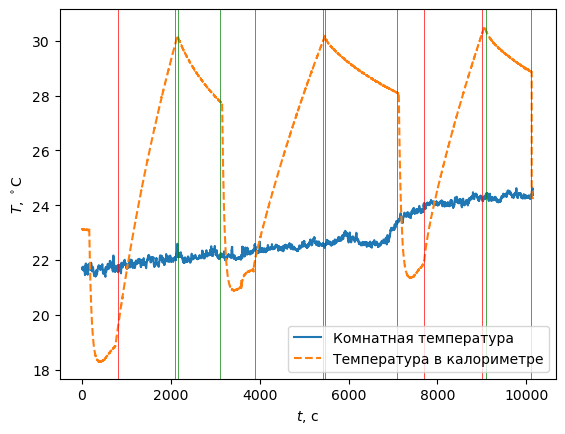

In [112]:
ehs = 800
ehe = 2100
ecs = 2150
ece = 3100
fehs = 3900
fehe = 5430
fecs = 5470
fece = 7100
alhs = 7700
alhe = 9000
alcs = 9100
alce = 10100

def line(x, color):
    plt.axvline(x=x, linewidth=0.5, color=color)
    
plt.xlabel("$t$, с")
plt.ylabel("$T$, $^\circ$C")
plt.plot(data["Time"], data["Tk"], label="Комнатная температура")
plt.plot(data["Time"], data["T"], '--', label="Температура в калориметре")

line(ehs, 'red')
line(ehe, 'red')
line(ecs, 'green')
line(ece, 'green')
line(alhs, 'red')
line(alhe, 'red')
line(alcs, 'green')
line(alce, 'green')
line(fehs, 'red')
line(fehe, 'red')
line(fecs, 'green')
line(fece, 'green')

plt.legend()

plt.savefig("fig.png", dpi=400)


In [113]:
p = 26.6502 * 0.2234

-3128.8557847202624 4.445264027586013 -3.234469036691518 0.3724448668641593


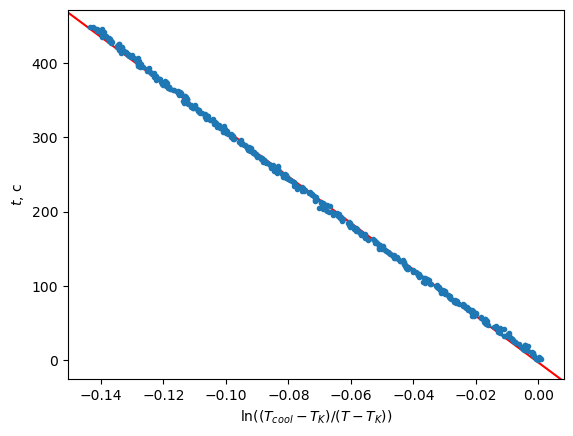

In [114]:
d = data.iloc[ecs+500:ece]
Tk = d["Tk"].mean()
T = d["T"].iloc[0]
x = np.log((d["T"]-Tk)/(T-Tk))
y = d["Time"] - d["Time"].iloc[0]
pp, V = np.polyfit(x, y, 1, cov=True)
k, b = pp
k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
print(k, k_err, b, b_err)
plt.axline([-0.1, b - 0.1 * k], [0, b], color='r')
plt.plot(x, y, '.')

plt.xlabel("$\ln((T_{cool}-T_{K})/(T-T_{K}))$")
plt.ylabel("$t$, с")
plt.savefig("lce.png")

0.2213275518592556 0.00010020559886727866 -0.14304432632544795 0.0005001761277814943


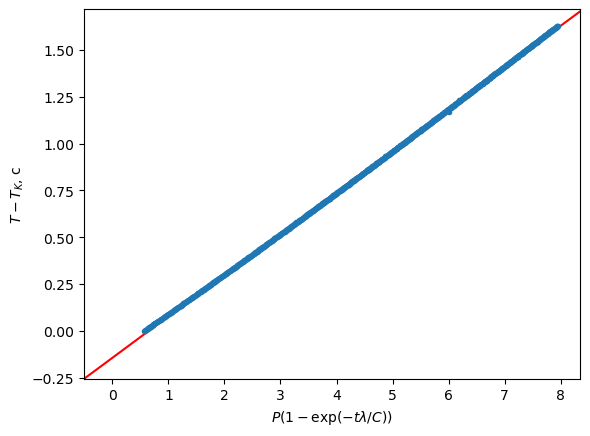

In [115]:
d = data.iloc[ehs+300:ehe]
y = 1 - np.exp(1/k * (d["Time"] - d["Time"].iloc[0]))
x = d["T"] - d["Tk"].mean()
y *= p
pp, V = np.polyfit(x, y, 1, cov=True)
kk, bb = pp
kk_err, bb_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
plt.axline([-0.1, bb - 0.1 * kk], [0, bb], color='r')
print(kk, kk_err, bb, bb_err)
plt.plot(x, y, '.')

plt.xlabel("$P(1-\exp(-t\lambda/C))$")
plt.ylabel("$T-T_{K}$, с")
plt.savefig("lhe.png")

In [116]:
lamb_empty = kk
c_empty = -k * lamb_empty
lamb_empty_err = lamb_empty * abs(kk_err/kk)
c_empty_err = c_empty * (abs(k_err/k) + abs(lamb_empty_err/lamb_empty))
print(f"Пустой калориметр:\nC\t= {c_empty}\t+/- {c_empty_err}\t\t({c_empty_err/c_empty * 100} %)\nlambda\t= {lamb_empty}\t+/-{lamb_empty_err}\t({lamb_empty_err/lamb_empty*100} %)")

Пустой калориметр:
C	= 692.5019909528057	+/- 1.2973882722708698		(0.18734794834103047 %)
lambda	= 0.2213275518592556	+/-0.00010020559886727866	(0.045274796574355285 %)


-5776.343946660977 7.05512703925193 -18.52727974846403 0.6748519863164932


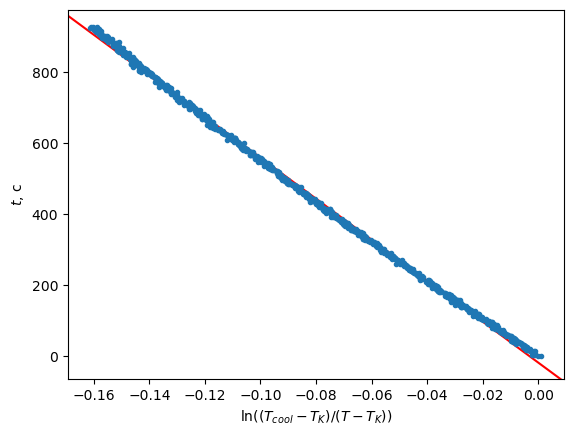

In [117]:
d = data.iloc[fecs+500:fece-200]
Tk = d["Tk"].mean()
T = d["T"].iloc[0]
x = np.log((d["T"]-Tk)/(T-Tk))
y = d["Time"] - d["Time"].iloc[0]
pp, V = np.polyfit(x, y, 1, cov=True)
k, b = pp
k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
print(k, k_err, b, b_err)
plt.axline([-0.1, b - 0.1 * k], [0, b], color='r')
plt.plot(x, y, '.')

plt.xlabel("$\ln((T_{cool}-T_{K})/(T-T_{K}))$")
plt.ylabel("$t$, с")
plt.savefig("lcf.png")

0.18483611668833902 8.853675541767268e-05 -0.17818206359468655 0.00042479385807380344


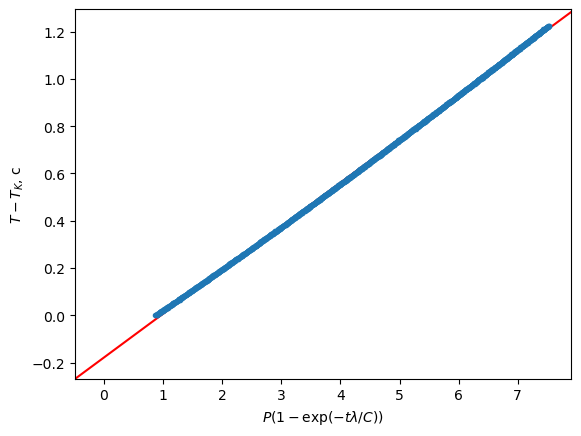

In [118]:
d = data.iloc[fehs+200:fehe]
y = 1 - np.exp(1/k * (d["Time"] - d["Time"].iloc[0]))
x = d["T"] - d["Tk"].mean()
y *= p
pp, V = np.polyfit(x, y, 1, cov=True)
kk, bb = pp
kk_err, bb_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
plt.axline([-0.1, bb - 0.1 * kk], [0, bb], color='r')
print(kk, kk_err, bb, bb_err)
plt.plot(x, y, '.')
plt.xlabel("$P(1-\exp(-t\lambda/C))$")
plt.ylabel("$T-T_{K}$, с")
plt.savefig("lhf.png")

In [119]:
lamb_fe = kk
c_fe = -k * lamb_fe
lamb_fe_err = lamb_fe * abs(kk_err/kk)
c_fe_err = c_fe * (abs(k_err/k) + abs(lamb_fe_err/lamb_fe))
print(f"Калориметр с железом:\nC\t= {c_fe}\t+/- {c_fe_err}\t\t({c_fe_err/c_fe * 100} %)\nlambda\t= {lamb_fe}\t+/-{lamb_fe_err}\t({lamb_fe_err/lamb_fe*100} %)")
print()
cc_fe = (c_fe - c_empty) / mfe
cc_fe_err = c_fe * (m_err/mfe + c_fe_err/c_fe)
print(f"Удельная теплоемкость железа: {cc_fe} +/- {cc_fe_err} ({cc_fe_err/cc_fe * 100} %)")

Калориметр с железом:
C	= 1067.676983757009	+/- 1.8154610358921026		(0.17003841644162299 %)
lambda	= 0.18483611668833902	+/-8.853675541767268e-05	(0.04790013824352235 %)

Удельная теплоемкость железа: 460.28093829493724 +/- 1.9464482747286882 (0.42288265986836276 %)


-4345.249114285606 7.928686879870962 -2.98617953675625 0.5305646938989368


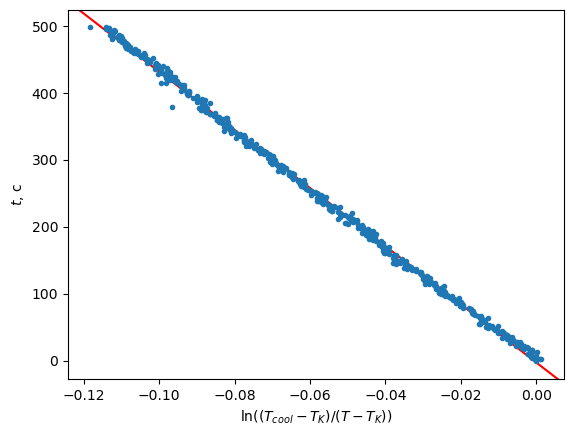

In [120]:
d = data.iloc[alcs+500:alce]
Tk = d["Tk"].mean()
T = d["T"].iloc[0]
x = np.log((d["T"]-Tk)/(T-Tk))
y = d["Time"] - d["Time"].iloc[0]
pp, V = np.polyfit(x, y, 1, cov=True)
k, b = pp
k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
print(k, k_err, b, b_err)
plt.axline([-0.1, b - 0.1 * k], [0, b], color='r')
plt.plot(x, y, '.')

plt.xlabel("$\ln((T_{cool}-T_{K})/(T-T_{K}))$")
plt.ylabel("$t$, с")
plt.savefig("lca.png")

0.21670479491072459 8.587028069989826e-05 -0.1066351459785205 0.0003254255411157691


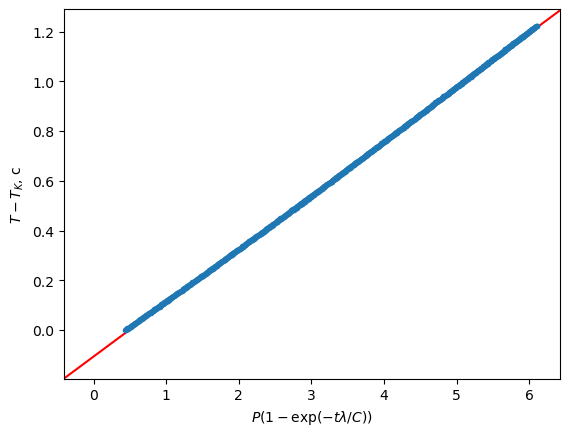

In [121]:
d = data.iloc[alhs+300:alhe]
y = 1 - np.exp(1/k * (d["Time"] - d["Time"].iloc[0]))
x = d["T"] - d["Tk"].mean()
y *= p
pp, V = np.polyfit(x, y, 1, cov=True)
kk, bb = pp
kk_err, bb_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
plt.axline([-0.1, bb - 0.1 * kk], [0, bb], color='r')
print(kk, kk_err, bb, bb_err)
plt.plot(x, y, '.')
plt.xlabel("$P(1-\exp(-t\lambda/C))$")
plt.ylabel("$T-T_{K}$, с")
plt.savefig("lha.png")

In [122]:
lamb_al =  kk
c_al = -k * lamb_al
lamb_al_err = lamb_al * abs(kk_err/kk)
c_al_err = c_al * (abs(k_err/k) + abs(lamb_al_err/lamb_al))
print(f"Калориметр с алюминием:\nC\t= {c_al}\t+/- {c_al_err}\t\t({c_al_err/c_al * 100} %)\nlambda\t= {lamb_al}\t+/- {lamb_al_err}\t({lamb_al_err/lamb_al*100} %)")
print()
cc_al = (c_al - c_empty) / mal
cc_al_err = c_al * (m_err/mal + c_al_err/c_al)
print(f"Удельная теплоемкость алюминия: {cc_al} +/- {cc_al_err} ({cc_al_err/cc_al * 100} %)")

Калориметр с алюминием:
C	= 941.6363181472699	+/- 2.091312225368479		(0.2220934117625444 %)
lambda	= 0.21670479491072459	+/- 8.587028069989826e-05	(0.03962546409518722 %)

Удельная теплоемкость алюминия: 846.8196029723458 +/- 2.4113789548542948 (0.28475710132244564 %)


In [123]:
t_e, t_fe, t_al = 1013, 3937, 7930

In [140]:
def get_k(t, delta, kkk=True):
    d = data[t-delta:t+delta]
    if t == t_e:
        d = d.drop(index=t-1)
    if t == t_fe:
        d = d.drop(index=t+8)
    x = d["Time"]
    y = d["T"]
    plt.plot(x, y, '.')
    if kkk:
        yy = d["Tk"]
        plt.plot(x, yy, '.')
    pp, V = np.polyfit(x, y, 1, cov=True)
    k, b = pp
    k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
    plt.axline([x.iloc[0], b + x.iloc[0] * k], [x.iloc[1], b + x.iloc[1] * k], color='r')
    plt.xlabel("$t$, с")
    plt.ylabel("$T$, $^\circ$C")
    plt.savefig(f"{t}.png", dpi=400)
    plt.cla()
    return k, k_err

0.009961393504990677 0.0002669104262854236
Пустой калориметр:
C	= 597.6728734807241	+/- 16.014337889578574		(2.67944867504432 %)
0.0070434784701696555 0.00017888605306672436
Калориметр с железом:
C	= 845.271935623109	+/- 21.467711014107238		(2.5397401841197866 %)
0.007519030716923777 0.0003564071529454145
Калориметр с алюминием:
C	= 791.8114587029894	+/- 37.53239989174378		(4.740067787503728 %)

Fe: c = 303.7652584252054 +/- 8.176501430301576
Al: c = 659.8864215576658  +/- 31.50336228209325


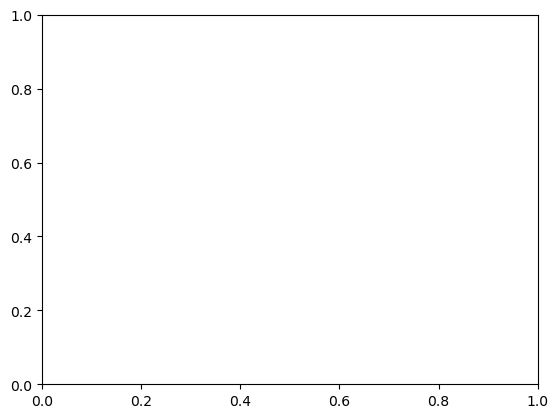

In [133]:
k, k_err = get_k(int(t_e), 10)
print(k, k_err)
ce, ce_err = p/k, p/k*k_err/k
print(f"Пустой калориметр:\nC\t= {ce}\t+/- {ce_err}\t\t({k_err/k * 100} %)")
k, k_err = get_k(int(t_fe), 10)
print(k, k_err)
cfe, cfe_err = p/k, p/k*k_err/k
print(f"Калориметр с железом:\nC\t= {cfe}\t+/- {cfe_err}\t\t({k_err/k * 100} %)")
k, k_err = get_k(int(t_al), 10)
print(k, k_err)
cal, cal_err = p/k, p/k*k_err/k
print(f"Калориметр с алюминием:\nC\t= {cal}\t+/- {cal_err}\t\t({k_err/k * 100} %)")
print()
ccfe = (cfe - ce) / mfe
ccfe_err = max(cfe_err/cfe, ce_err/ce) + m_err/mfe
print(f"Fe: c = {ccfe} +/- {ccfe_err * ccfe}")
ccal = (cal - ce) / mal
ccal_err = max(cal_err/cal, ce_err/ce) + m_err/mal
print(f"Al: c = {ccal}  +/- {ccal_err * ccal}")

In [18]:
def get_times(t):
    times = []
    prow = data.iloc[0]
    for i in range(len(data)):
        row = data.iloc[i]
        if (row["T"] > t and prow["T"] < t) or (row["T"] < t and prow["T"] > t):
            times.append(row["Time"])
        prow = row
    return times

In [19]:
get_times(29)

[1955.0,
 2510.0,
 5195.0,
 6173.0,
 6174.0,
 6175.0,
 6177.0,
 6178.0,
 8753.0,
 9976.0,
 9978.0,
 9979.0,
 9980.0,
 9981.0,
 9982.0,
 9985.0,
 9986.0,
 9988.0,
 9991.0,
 9992.0]

In [145]:
def get_clambda(tc, th):
    A, A_err = get_k(tc, 10, False)
    B, B_err = get_k(th, 10, False)
    print("========")
    print(A, A_err)
    print(B, B_err)
    tk1 = data["Tk"][tc]
    tk2 = data["Tk"][th]
    t = data["T"][tc]
    print(tk1, tk2, t)
    lamb = p / ((t - tk2) * (1-A/B) + tk2 - tk1)
    c = p/(A-B+A*(tk1-tk2)/(t-tk1))
    print("========")
    return lamb, lamb * max(A_err/A, B_err/B), c, c * max(A_err/A, B_err/B)

0.006355252131148251 0.00022488019178112015
-0.002580579354556061 0.00018417112762966173
21.9662322 22.1103763 29.009581662611424
0.004171773132232107 0.00021592679171737782
-0.0010641067510946231 0.00015902589530286646
22.7009391 22.9951171 29.00234234955451
0.005493423022226786 0.0002422636649829672
-0.00046336879093684724 0.0003977617441589751
24.2590084 24.3291397 29.01144648665013
Пустой калориметр:
C	= 676.1083955051357	+/- 23.92405250152515		(3.53849362921325 %)
lambda	= 0.24771614359678315	+/- 0.008765419959704918	(3.53849362921325 %)

Калориметр с железом:
C	= 1181.0176216475613	+/- 61.12828716253824		(5.175899668394628 %)
lambda	= 0.19943634371371677	+/- 0.010322625052936636	(5.175899668394628 %)

Калориметр с алюминием:
C	= 1013.2628404477404	+/- 44.68557551907151		(4.410067529894402 %)
lambda	= 0.09879442271923493	+/- 0.004356900757687597	(4.410067529894402 %)


Fe: c = 619.4445174118827 +/- 32.137822860190006
Al: c = 1146.0042316200022  +/- 50.929092879576835


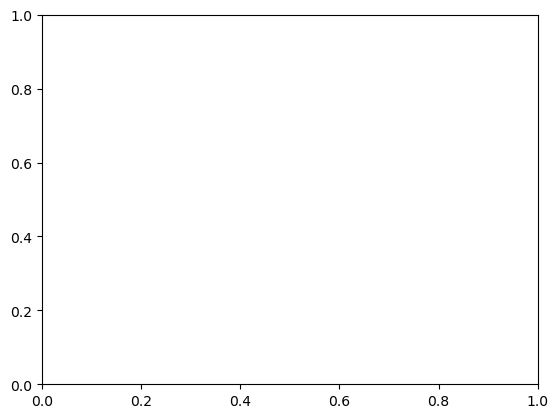

In [146]:
el, ele, ec, ece = get_clambda(1955, 2510)
fel, fele, fec, fece = get_clambda(5195, 6175)
_all, ale, alc, alce = get_clambda(8753, 9988)

print(f"Пустой калориметр:\nC\t= {ec}\t+/- {ece}\t\t({ece/ec * 100} %)\nlambda\t= {el}\t+/- {ele}\t({ele/el*100} %)\n")
print(f"Калориметр с железом:\nC\t= {fec}\t+/- {fece}\t\t({fece/fec * 100} %)\nlambda\t= {fel}\t+/- {fele}\t({fele/fel*100} %)\n")
print(f"Калориметр с алюминием:\nC\t= {alc}\t+/- {alce}\t\t({alce/alc * 100} %)\nlambda\t= {_all}\t+/- {ale}\t({ale/_all*100} %)\n")

print()

ccfe = (fec - ec) / mfe
ccfe_err = max(fece/fec, ece/ec) + m_err/mfe
print(f"Fe: c = {ccfe} +/- {ccfe_err * ccfe}")
ccal = (alc - ec) / mal
ccal_err = max(alce/alc, ece/ec) + m_err/mal
print(f"Al: c = {ccal}  +/- {ccal_err * ccal}")

# Интегральный метод
## Пустой калориметр:
C = 692.5 +/- 1.3 (0.19 %)

lambda = 0.22133 +/-0.00010 (0.0452747965743551 %)
## Калориметр с железом:
C = 1067.7 +/- 1.8 (0.17 %)

lambda = 0.18484 +/- 8e-05 (0.05 %)

Удельная теплоемкость железа: 460 +/- 2 (0.4 %)
## Калориметр с алюминием:
C = 942 +/- 2 (0.2 %)
lambda = 0.21670 +/- 9e-05 (0.04 %)

Удельная теплоемкость алюминия: 847 +/- 2 (0.3 %)

# Дифференциальный метод (1)
Пустой калориметр:

C	= 609	+/- 11		(1.8 %)
Калориметр с железом:

C	= 843	+/- 12		(1.4 %)
Калориметр с алюминием:

C	= 833	+/- 12		(1.4 %)

Fe: c = 287 +/- 5 (1.7 %)

Al: c = 760  +/- 14 (1.8 %)

# Дифференциальный метод (2)
Пустой калориметр:

C	= 676	+/- 24		(4 %)

lambda	= 0.248	+/- 0.009	(4 %)

Калориметр с железом:

C	= 1180	+/- 60		(5 %)

lambda	= 0.199	+/- 0.010	(5 %)

Калориметр с алюминием:

C	= 1010	+/- 40		(4 %)

lambda	= 0.099	+/- 0.004	(4 %)


Fe: c = 620 +/- 30 (5 %)
Al: c = 1150  +/- 50 (4 %)